**Задание 1**

Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [5]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn import datasets
boston = datasets.load_boston()

In [9]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [7]:
data = boston["data"]
feature_names = boston["feature_names"]

In [10]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
data.shape

(506, 13)

In [8]:
x = pd.DataFrame(data, columns=feature_names)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
target = boston["target"]
y = pd.DataFrame(target, columns=["price"])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [13]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [14]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [18]:
lr.fit(x_train, y_train)

LinearRegression()

In [19]:
y_pred=lr.predict(x_test)

In [20]:
from sklearn.metrics import r2_score

In [21]:
r2_score(y_test, y_pred)

0.7112260057484974

**Задание 2**

Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [23]:
param=[{'n_estimators':[1000], 
        'max_features':[5],
        'max_depth':[12],
        }]

In [24]:
clf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param
)

In [25]:
clf.fit(x_train, y_train.values[:, 0])

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_depth': [12], 'max_features': [5],
                          'n_estimators': [1000]}])

In [26]:
y_pred2=clf.predict(x_test)

In [27]:
r2_score(y_test, y_pred2)

0.871923572495127

In [28]:
#было по модели Лиейной регресии
r2_score(y_test, y_pred)

0.7112260057484974

**Результаты по модели Cлучайный лес значительно превосходят результаты по модели Линейной регресии.**

**Задание 3 **

Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
# далее - (X, y) - обучение, (X2, y2) - контроль
# модель - здесь (для контраста) рассмотрим регрессор
model =  RandomForestRegressor(n_estimators=1000 ,
                               max_features=5,
                              max_depth=12,
                               oob_score=True,
                               random_state=42)
model.fit(x_train, y_train.values[:, 0]) # обучение
a = model.predict(x_test) # предсказание
r2_score(y_test, a)

0.871923572495127

In [36]:
model.feature_importances_

array([0.03182093, 0.00157513, 0.00730569, 0.00119899, 0.01465362,
       0.40246479, 0.01455758, 0.06398452, 0.00506225, 0.01177065,
       0.01807837, 0.01233526, 0.41519223])

In [43]:
feature_imp = pd.Series(model.feature_importances_, index=feature_names)
feature_imp

CRIM       0.060002
ZN         0.004445
INDUS      0.040992
CHAS       0.008953
NOX        0.057843
RM         0.325730
AGE        0.022203
DIS        0.059222
RAD        0.007327
TAX        0.025268
PTRATIO    0.058584
B          0.016822
LSTAT      0.312610
dtype: float64

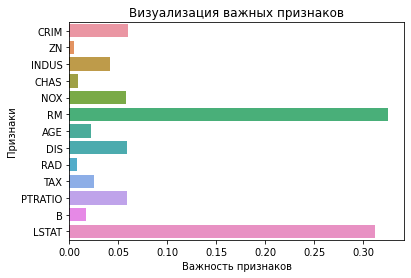

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_names)

plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Визуализация важных признаков')
plt.show()

**Ответ: Два самых значимых показателя RM и  LSTAT**

**Задание 4**

В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакциции по кредитной карте являются мошенническими.Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.Мы будем вычислять AUC, то есть площадь под кривой ROC.
Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.
Загрузите датасет creditcard.csv и создайте датафрейм df.
С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована. Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:
pd.options.display.max_columns = 100.
Просмотрите первые 10 строк датафрейма df.
Создайте датафрейм X из датафрейма df, исключив столбец Class.
Создайте объект Series под названием y из столбца Class.
Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: test_size=0.3, random_state=100, stratify=y.
У вас должны получиться объекты X_train, X_test, y_train и y_test.
Просмотрите информацию о их форме.
Для поиска по сетке параметров задайте такие параметры:
parameters = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]
Создайте модель GridSearchCV со следующими аргументами:
estimator=RandomForestClassifier(random_state=100),
param_grid=parameters,
scoring='roc_auc',
cv=3.
Обучите модель на тренировочном наборе данных (может занять несколько минут).
Просмотрите параметры лучшей модели с помощью атрибута best_params_.
Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.
Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba. Из модуля sklearn.metrics импортируйте метрику roc_auc_score.
Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументов массивы y_test и y_pred_proba.


In [45]:
import numpy as np
import pandas as pd
df=pd.read_csv('creditcard.csv')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [50]:
info_class=df['Class'].value_counts(normalize=True )
info_class

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [65]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [59]:
df.shape

(284807, 31)

In [68]:
X=df.drop('Class', axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [70]:
X.shape

(284807, 30)

In [88]:
Series=df.drop('Time', axis=1)
Series=Series.drop('V1', axis=1)
Series=Series.drop('V2', axis=1)
Series=Series.drop('V3', axis=1)
Series=Series.drop('V4', axis=1)
Series=Series.drop('V5', axis=1)
Series=Series.drop('V6', axis=1)
Series=Series.drop('V7', axis=1)
Series=Series.drop('V8', axis=1)
Series=Series.drop('V9', axis=1)
Series=Series.drop('V10', axis=1)
Series=Series.drop('V11', axis=1)
Series=Series.drop('V12', axis=1)
Series=Series.drop('V13', axis=1)
Series=Series.drop('V14', axis=1)
Series=Series.drop('V15', axis=1)
Series=Series.drop('V16', axis=1)
Series=Series.drop('V17', axis=1)
Series=Series.drop('V18', axis=1)
Series=Series.drop('V19', axis=1)
Series=Series.drop('V20', axis=1)
Series=Series.drop('V21', axis=1)
Series=Series.drop('V22', axis=1)
Series=Series.drop('V23', axis=1)
Series=Series.drop('V24', axis=1)
Series=Series.drop('V25', axis=1)
Series=Series.drop('V26', axis=1)
Series=Series.drop('V27', axis=1)
Series=Series.drop('V28', axis=1)
Series=Series.drop('Amount', axis=1)
Series.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [89]:
Series.shape

(284807, 1)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, Series, test_size=0.3, random_state=100)

In [ ]:
param=[{'n_estimators': [10, 15],
        'max_features': np.arange(3, 5), 
        'max_depth': np.arange(4, 7)}]

In [ ]:
clf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=100),
    param_grid=param,
    scoring='roc_auc', 
    cv=3
)

In [93]:
clf.fit(X_train, y_train.values[:, 0])

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_depth': [12], 'max_features': [5],
                          'n_estimators': [1000]}])

In [94]:
clf.best_params_

{'max_depth': 12, 'max_features': 5, 'n_estimators': 1000}

In [95]:
from sklearn.metrics import roc_auc_score

In [99]:
pred=clf.predict(X_test) # предсказание


In [102]:
pred.shape

(85443,)

In [104]:
roc_auc_score(y_test, pred)

0.9725449448192656